In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import font_manager, rc 

font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

In [3]:
train = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/구내식당 식사 인원 예측/train.csv")
test = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/구내식당 식사 인원 예측/test.csv")
submission = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/구내식당 식사 인원 예측/sample_submission.csv")

In [4]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [5]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [8]:
train[train["일자"] == "2018-06-01"]["요일"]
train.loc[train["일자"] == "2018-06-01", "요일"] = "금"
train[train["일자"] == "2018-06-01"]["요일"]

573    금
Name: 요일, dtype: object

조식메뉴는 주요한 내용이 아니라고 판단

In [9]:
df = train
del df["조식메뉴"]
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


encoding

In [10]:
df=df.replace(['월', '화', '수', '목', '금'], [1, 2, 3, 4, 5])
df.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,4,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,5,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


변수 추가

In [11]:
df['일자'] = pd.to_datetime(df['일자'])
df['월']=df['일자'].dt.month
df['일']=df['일자'].dt.day
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,월,일
0,2016-02-01,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2,1
1,2016-02-02,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2,2
2,2016-02-03,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2,3
3,2016-02-04,4,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2,4
4,2016-02-05,5,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,3,2983,75,198,4,391.0,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,1,20
1201,2021-01-21,4,2983,92,231,462,351.0,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,1,21
1202,2021-01-22,5,2983,255,248,1,303.0,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,1,22
1203,2021-01-25,1,2983,107,153,616,327.0,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,1,25


## 중식계 예측

In [12]:
lunch = []
for day in range(len(df)):
    tmp = df.iloc[day, 7].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제
    search = '('   # 원산지 정보는 삭제
    
    for menu in tmp:
        if ('(' in menu)&(menu[0]=='(')&(menu[-1]==')'):
            tmp.remove(menu)
    lunch.append(tmp) 

In [13]:
np.array(train[ (train.index > 1064) & (train.index < 1069)][["일자", "중식메뉴"]])

array([['2020-06-11',
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국  굴비구이  토마토프리타타  도라지오이무침  배추겉절이 (배추국내,고추가루:중국산) '],
       ['2020-06-12',
        '돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국  양파링카레튀김  모듬어묵볶음  참나물생채 요구르트 포기김치 (김치:국내산) '],
       ['2020-07-01',
        '쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드*딸기요거트 '],
       ['2020-07-02',
        '쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈 ']],
      dtype=object)

In [14]:
밥 = []; 국 = []; 반찬1 = []; 반찬2 = []; 반찬3 = []; 김치 = []; 사이드 = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; 밥.append(bob_tmp)
    gook_tmp = day_menu[1]; 국.append(gook_tmp)
    banchan1_tmp = day_menu[2]; 반찬1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; 반찬2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; 반찬3.append(banchan3_tmp)

    if i < 1067:
        kimchi_tmp = day_menu[-1]; 김치.append(kimchi_tmp)
        side_tmp = day_menu[-2]; 사이드.append(side_tmp)
    else: 
        kimchi_tmp = day_menu[-2]; 김치.append(kimchi_tmp)
        side_tmp  = day_menu[-1]; 사이드.append(side_tmp)

In [15]:
df_lunch = df[["일자","월", "일", "요일", "본사정원수", "본사휴가자수", "본사출장자수", "본사시간외근무명령서승인건수", "현본사소속재택근무자수", "중식메뉴", "중식계"]]
df_lunch['밥'] = 밥
df_lunch['국'] = 국
df_lunch['반찬1'] = 반찬1; df_lunch['반찬2'] = 반찬2; df_lunch['반찬3'] = 반찬3
df_lunch['김치'] = 김치 
df_lunch['사이드'] = 사이드

<ipython-input-15-c61a9b2134f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lunch['밥'] = 밥


In [16]:
df_lunch

,일자,월,일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,중식계,밥,국,반찬1,반찬2,반찬3,김치,사이드
0,2016-02-01,2,1,1,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,포기김치,요구르트
1,2016-02-02,2,2,2,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,배추겉절이,요구르트
2,2016-02-03,2,3,3,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",1017.0,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,포기김치,요구르트
3,2016-02-04,2,4,4,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...",978.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,포기김치,요구르트
4,2016-02-05,2,5,5,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...",925.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,포기김치,요구르트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,1,20,3,2983,75,198,4,391.0,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,1093.0,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,단호박물김치,양상추샐러드*오리엔탈D
1201,2021-01-21,1,21,4,2983,92,231,462,351.0,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,832.0,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,무생채,양상추샐러드*파인D
1202,2021-01-22,1,22,5,2983,255,248,1,303.0,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,579.0,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,포기김치,양상추샐러드*자몽D
1203,2021-01-25,1,25,1,2983,107,153,616,327.0,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,1145.0,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,봄동겉절이/양념김,양상추샐러드*오렌지D


In [17]:
df_lunch["밥"].value_counts().nlargest(20)

쌀밥/잡곡밥          879
쌀밥/흑미밥/찰현미밥      74
콩나물밥             23
카레덮밥             18
나물비빔밥            15
곤드레밥*강된장         12
쌀밥/수수밥/찰현미밥      10
단호박영양밥           10
김치제육덮밥            8
카레라이스             8
곤드레밥              8
곤드레밥*양념장          8
비빔밥               8
낙지비빔밥             6
짜장덮밥              6
쌀밥/차조밥/찰현미밥       6
콩나물밥*양념장          5
산채비빔밥             5
쌀밥/찰보리밥/찰현미밥      5
쌀밥/기장밥/찰현미밥       5
Name: 밥, dtype: int64

<AxesSubplot:>

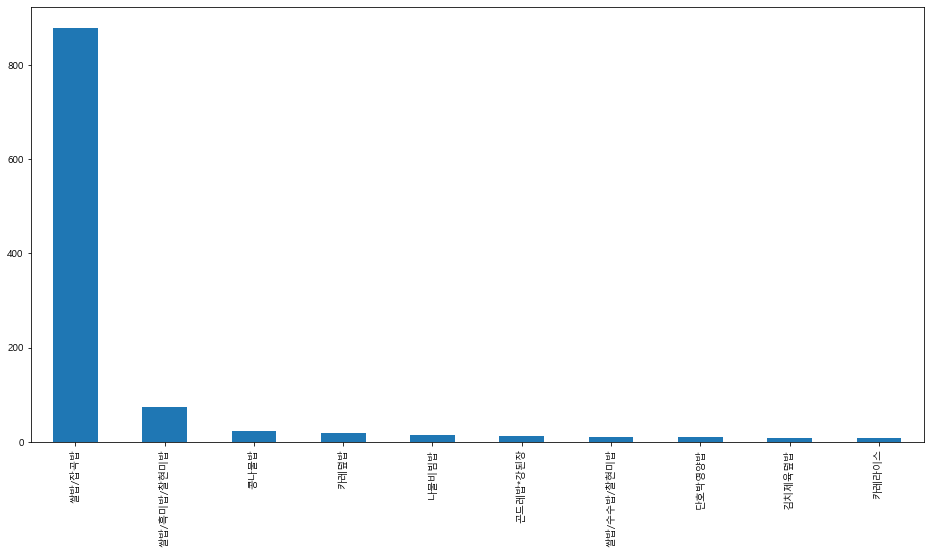

In [18]:
df_lunch["밥"].value_counts().nlargest(10).plot(kind='bar',stacked=False, figsize=(16,8))

C:\Users\yhg31\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yhg31\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

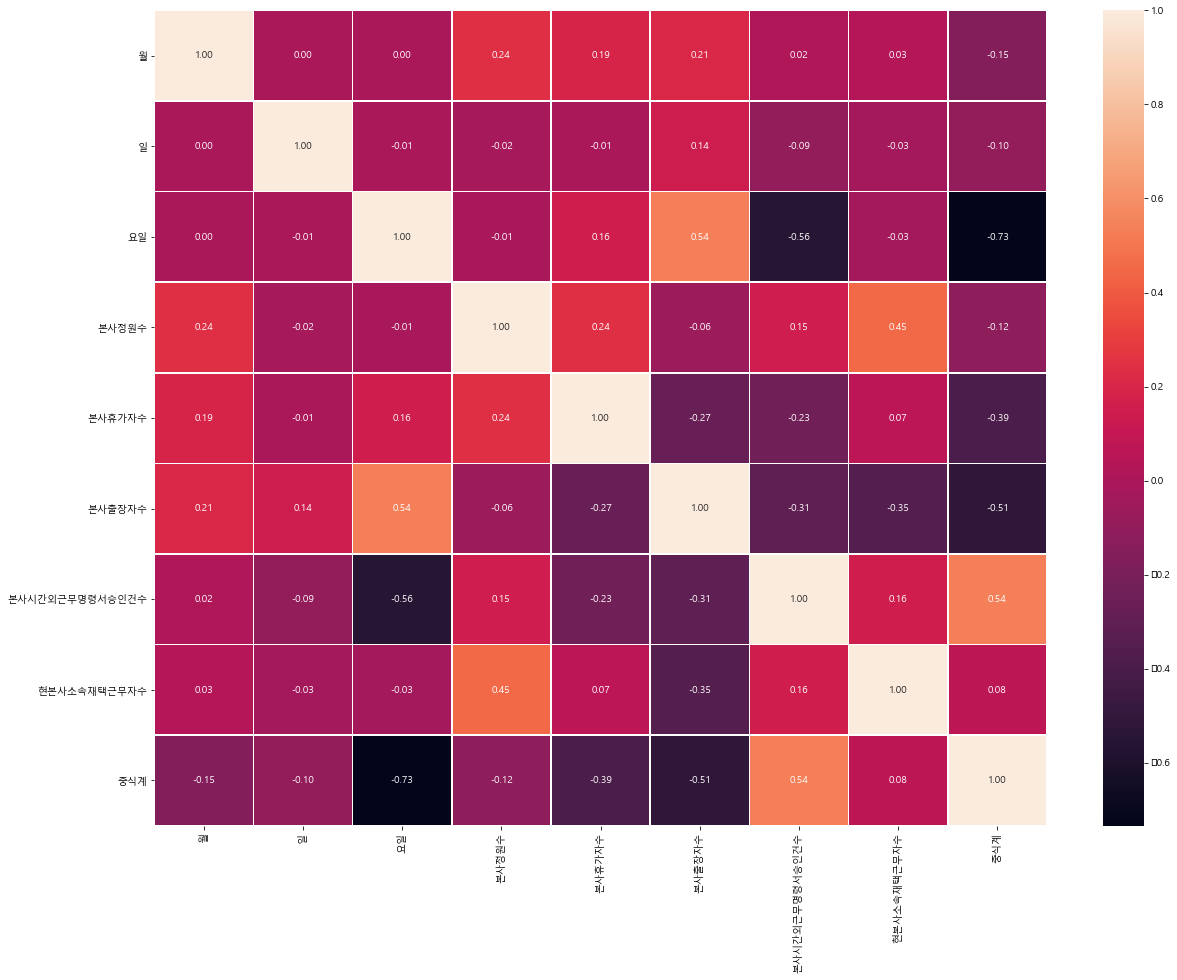

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 15))
sns.heatmap(data = df_lunch.corr(), annot = True, fmt = '.2f', linewidths = .5)

In [20]:
df_lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   월               1205 non-null   int64         
 2   일               1205 non-null   int64         
 3   요일              1205 non-null   int64         
 4   본사정원수           1205 non-null   int64         
 5   본사휴가자수          1205 non-null   int64         
 6   본사출장자수          1205 non-null   int64         
 7   본사시간외근무명령서승인건수  1205 non-null   int64         
 8   현본사소속재택근무자수     1205 non-null   float64       
 9   중식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  밥               1205 non-null   object        
 12  국               1205 non-null   object        
 13  반찬1             1205 non-null   object        
 14  반찬2             1205 non-null   object        
 15  반찬3 

In [21]:
x=df_lunch.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]]
y=df_lunch.iloc[:, [10]]

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((964, 8), (241, 8), (964, 1), (241, 1))

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
fr = RandomForestRegressor()
fr.fit(x_train,y_train)
print("\nRandomForest score : {:.3f}".format(fr.score(x_test, y_test)))

y_pred=fr.predict(x_test)
print("RandomForest mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))


from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 0)
gb.fit(x_train,y_train)
print("\nGradientBoosting score : {:.3f}".format(gb.score(x_test, y_test)))

y_pred=gb.predict(x_test)
print("GradientBoosting mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))


import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
print("\nxgboost score : {:.3f}".format(xgb.score(x_test, y_test)))

y_pred=xgb.predict(x_test)
print("xgboost mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))


import lightgbm as lgb
lgb = lgb.LGBMRegressor()
lgb.fit(x_train, y_train)
print("\nlightgbm score : {:.3f}".format(lgb.score(x_test, y_test)))

y_pred=lgb.predict(x_test)
print("lightgbm mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))

<ipython-input-23-0441ba9892c7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fr.fit(x_train,y_train)



RandomForest score : 0.757
RandomForest mae : 74.542

GradientBoosting score : 0.781
GradientBoosting mae : 69.901


C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)



xgboost score : 0.758
xgboost mae : 76.704

lightgbm score : 0.779
lightgbm mae : 72.647


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state = 0)
model.fit(x_train,y_train)
print("\nGradientBoosting score : {:.3f}".format(model.score(x_test, y_test)))

y_pred=model.predict(x_test)
print("GradientBoosting mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))


GradientBoosting score : 0.781
GradientBoosting mae : 69.901


C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor(random_state = 0)

params = {
    'n_estimators' : [415],
    'learning_rate' : [0.035]
}
cv = GridSearchCV(estimator=gb, param_grid=params, cv=3, scoring = 'neg_mean_absolute_error')
cv.fit(x_train, y_train)

print("score : {:.3f}".format(cv.score(x_test, y_test)))
print("최적 파라미터 : ", cv.best_params_)
print("최적 MAE : ", cv.best_score_)

C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yhg31\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

score : -70.203
최적 파라미터 :  {'learning_rate': 0.035, 'n_estimators': 415}
최적 MAE :  -68.17502116802218


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
y_pred=cv.predict(x_test)
y_pred=y_pred.astype('int64')
print("GradientBoosting mae : {:.3f}".format(mean_absolute_error(y_test, y_pred)))

GradientBoosting mae : 70.154


## test 데이터 적용

In [31]:
submission = pd.read_csv("구내식당 식수 인원 예측 AI 경진대회(석식계).csv")

In [32]:
test

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치
5,2021-02-03,수,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치
6,2021-02-04,목,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치
7,2021-02-05,금,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치
8,2021-02-08,월,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치
9,2021-02-09,화,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지


In [33]:
del test["조식메뉴"]
del test["중식메뉴"]
del test["석식메뉴"]

In [34]:
test['일자'] = pd.to_datetime(test['일자'])
test['월']=test['일자'].dt.month
test['일']=test['일자'].dt.day
test=test.replace(['월', '화', '수', '목', '금'], [1, 2, 3, 4, 5])
test

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,월,일
0,2021-01-27,3,2983,88,182,5,358.0,1,27
1,2021-01-28,4,2983,104,212,409,348.0,1,28
2,2021-01-29,5,2983,270,249,0,294.0,1,29
3,2021-02-01,1,2924,108,154,538,322.0,2,1
4,2021-02-02,2,2924,62,186,455,314.0,2,2
5,2021-02-03,3,2924,59,199,5,286.0,2,3
6,2021-02-04,4,2924,61,211,476,288.0,2,4
7,2021-02-05,5,2924,169,252,0,256.0,2,5
8,2021-02-08,1,2924,88,174,690,329.0,2,8
9,2021-02-09,2,2924,94,183,542,329.0,2,9


In [35]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   월               1205 non-null   int64  
 1   일               1205 non-null   int64  
 2   요일              1205 non-null   int64  
 3   본사정원수           1205 non-null   int64  
 4   본사휴가자수          1205 non-null   int64  
 5   본사출장자수          1205 non-null   int64  
 6   본사시간외근무명령서승인건수  1205 non-null   int64  
 7   현본사소속재택근무자수     1205 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 75.4 KB


In [41]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   월               50 non-null     int64  
 1   일               50 non-null     int64  
 2   요일              50 non-null     int64  
 3   본사정원수           50 non-null     int64  
 4   본사휴가자수          50 non-null     int64  
 5   본사출장자수          50 non-null     int64  
 6   본사시간외근무명령서승인건수  50 non-null     int64  
 7   현본사소속재택근무자수     50 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 3.2 KB


In [40]:
x_data=test.iloc[:, [7, 8, 1, 2, 3, 4, 5, 6]]
x_data

,월,일,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,1,27,3,2983,88,182,5,358.0
1,1,28,4,2983,104,212,409,348.0
2,1,29,5,2983,270,249,0,294.0
3,2,1,1,2924,108,154,538,322.0
4,2,2,2,2924,62,186,455,314.0
5,2,3,3,2924,59,199,5,286.0
6,2,4,4,2924,61,211,476,288.0
7,2,5,5,2924,169,252,0,256.0
8,2,8,1,2924,88,174,690,329.0
9,2,9,2,2924,94,183,542,329.0


In [42]:
real_pred = cv.predict(x_data)
real_pred = real_pred.astype('int64')
real_pred

array([1006,  928,  580, 1203, 1008,  959,  919,  637, 1218, 1028,  807,
       1260, 1016, 1006,  804,  614, 1181, 1009,  862,  790,  531, 1102,
       1029,  883,  642, 1264, 1088, 1020,  895,  690, 1278, 1033, 1029,
        905,  631, 1218,  994,  911,  824,  580, 1205, 1000,  957,  816,
        607, 1210, 1030, 1002,  866,  604], dtype=int64)

In [43]:
submission['중식계']=real_pred

In [44]:
submission

,Unnamed: 0,일자,중식계,석식계
0,0,2021-01-27,1006,361
1,1,2021-01-28,928,396
2,2,2021-01-29,580,252
3,3,2021-02-01,1203,421
4,4,2021-02-02,1008,457
5,5,2021-02-03,959,387
6,6,2021-02-04,919,458
7,7,2021-02-05,637,330
8,8,2021-02-08,1218,618
9,9,2021-02-09,1028,539


In [45]:
del submission['Unnamed: 0']

In [46]:
submission=submission.set_index('일자')

In [47]:
submission

,중식계,석식계
일자,,
2021-01-27,1006,361
2021-01-28,928,396
2021-01-29,580,252
2021-02-01,1203,421
2021-02-02,1008,457
2021-02-03,959,387
2021-02-04,919,458
2021-02-05,637,330
2021-02-08,1218,618


In [48]:
submission.to_csv("최종.csv")